# **Analysis of the influence of aquaculture pond construction on mangrove forests in Asian countries.**

## Introduction
Almost one third of the world's mangrove forests have been lost due to deforestation in the last 50 years (Alongi, 2002; Barbier, 2014). Along with coastal development, another major cause of global mangrove deforestation is the development of shrimp farms to support a booming export fishing industry (Barbier and Cox, 2004; Hamilton, 2020; Richards and Friess, 2016), with global demand for shrimp continuing to rise (Anderson et al., 2019). A study by Hamilton (2013) found that 51.9% of the original mangrove areas have been deforested between the 1970s and after 2004, with commercial aquaculture accounting for 28% of the total mangrove loss in eight countries: Indonesia, Brazil, Bangladesh, India, Thailand, Vietnam, Ecuador and China.

This notebook series studies the influence of aquaculture pond construction on mangrove forests through spatial analysis of two datasets: Aquaculture dynamics (Ottinger et al., 2021) and the Global Mangrove Watch version 3 (Bunting et al., 2018; Bunting, Rosenqvist, Hilarides, Lucas, & Thomas, 2022; Bunting, Rosenqvist, Hilarides, Lucas, Thomas, et al., 2022).

The general objective is to look for a relationship between the activation or construction of aquaculture ponds and the loss of mangrove forest extent. For this purpose, several notebooks were made for the different steps in the analysis process:


1. DataPreparation: The datasets are divided by countries in Asia and the layers are organised in separate folders.
2.   DataAnalysis: We proceed to analyse the relationship between both datasets using geoprocessing tools and working with dataframes.
MangroveChangeAnalysis: Only the Global Mangrove Watch dataset is analysed and an analysis of the dynamics within Asia is made.
4. GraphicOutput: The results of the analysis are visualised for interpretation and understanding.
5.   HexagonMangrove: Mapping the cumulative mangrove forest loss from 1996 to 2020 in the ten countries with the highest mangrove loss in Asia.
6.   HexagonPonds: Mapping cumulative mangrove loss due to pond construction from 1996 to 2019.


# Notebooks 3: Mangrove Change Analysis in Asia

The goal of this notebook is to analyse the dynamics of mangrove forests in Asia using the layers of Global Mangrove Watch v3 (Bunting et al., 2022). With this analysis we will be able to know which are the countries where mangrove forest loss has been localised from 1996 to 2020. The results of this analysis will be used to correlate the total losses in each country over time with the losses caused by the construction of aquaculture ponds.

## 3.1 Analysis of the total area

In this part we will create a dataframe with the total area in meters of each country of Asia. We will use the mangrove layers already cut out for the Asian region.

First we define the libraries we will be working with.

In [ ]:
from pyproj import CRS
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import glob
import pandas as pd

We then create a loop to load the mangrove layers and calculate the total area per country and create a dataframe with this data.

In [ ]:

# List of years
years = ["1996", "2007", "2008", "2009", "2010", "2015", "2016", "2017", "2018", "2019", "2020"]

# Initialize results
results = {}

# Iterate through years
for year in years:
    # Load the mangrove forest layer for the given year
    mangroves = gpd.read_file(f'/content/drive/MyDrive/colab_data/Mangrove/GMW_v3/asia/gmw_v3_asia_{year}.shp').to_crs(3857)

    # Calculate the area of each polygon
    mangroves['area'] = mangroves.geometry.area / 1000000

    # Group by country and sum the areas
    areas_by_country = mangroves.groupby('name')['area'].sum()

    # Add the areas to the results and print when each country is completed
    for country_name, area in areas_by_country.iteritems():
        if country_name not in results:
            results[country_name] = {}
        results[country_name][year] = area
        print(f"Completed {country_name} for {year}")

# Results now contains the total mangrove area for each country and year

In [ ]:
areas_by_country.head()

name
Bangladesh    5244.023696
Brunei         111.168308
Cambodia       649.195810
China          239.043807
East Timor      10.809492
Name: area, dtype: float64

We then created a graph to illustrate the countries with the largest mangrove areas today.

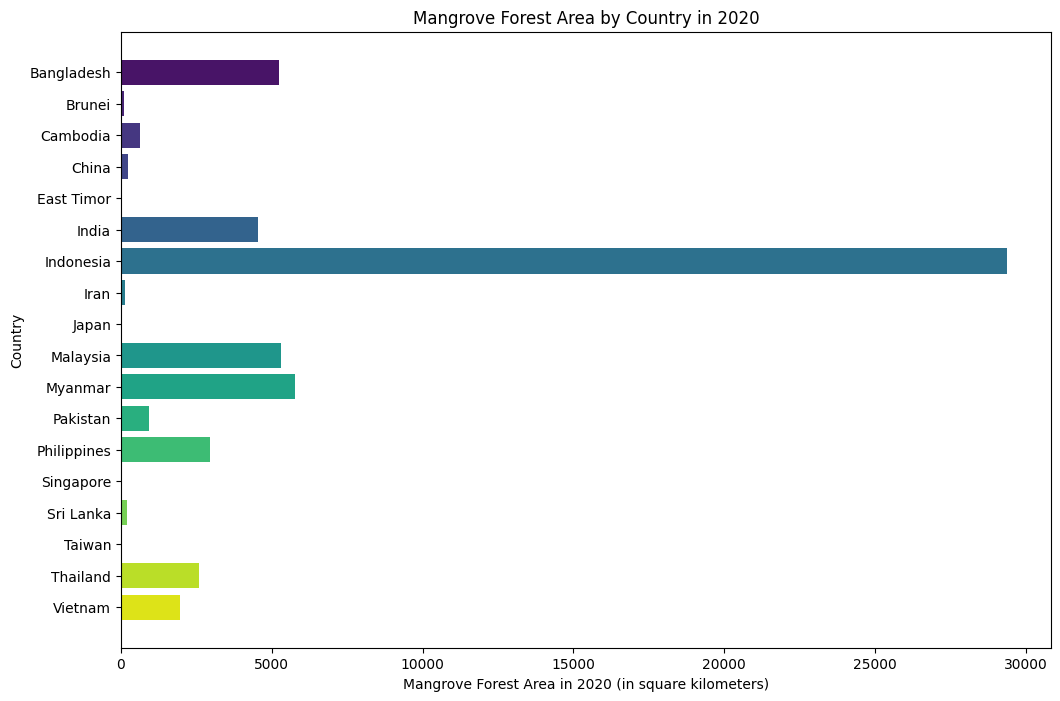

In [ ]:
# Year to be plotted
plot_year = "2020"

# Values and labels
values = [country_data[plot_year] for country_name, country_data in results.items()]
labels = [country_name for country_name, country_data in results.items()]

# Create a color palette with as many colors as there are countries
palette = sns.color_palette("viridis", n_colors=len(results))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the horizontal bar chart
bars = plt.barh(labels, values, color=palette)

# Add labels
plt.xlabel(f'Mangrove Forest Area in {plot_year} (in square kilometers)')
plt.ylabel('Country')
plt.title(f'Mangrove Forest Area by Country in {plot_year}')

# Invert the y-axis to have the largest value at the top
plt.gca().invert_yaxis()

# Show the plot
plt.show()




The resulting graph shows that Indonesia is the country with the largest mangrove area by far in relation to other Asian countries, followed by Bangladesh, Myanmar, Malaysia and Bangladesh.

We then created a series of graphs to illustrate the behaviour of mangrove extent over the years. This allows us to see in which countries mangrove cover has been decreasing or increasing.

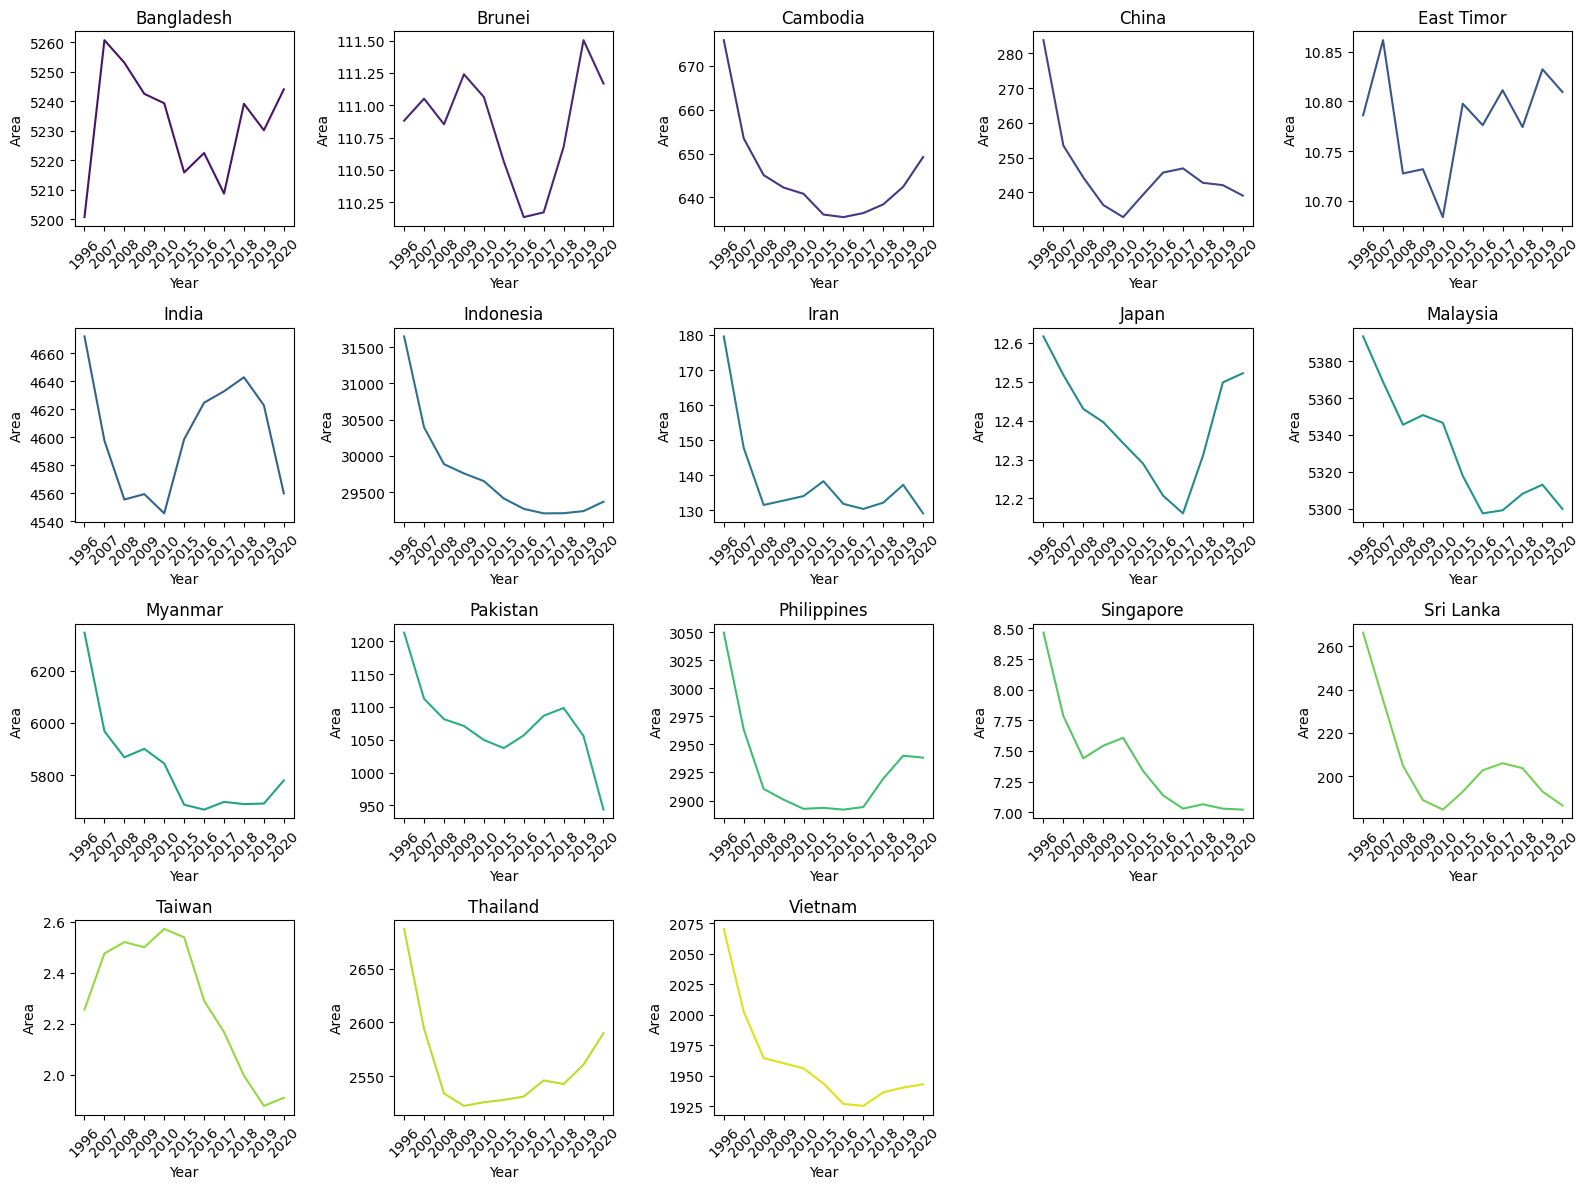

In [ ]:
# Determine the number of countries
n_countries = len(results)

# Determine the number of rows and columns for your grid
n_cols = int(math.ceil(math.sqrt(n_countries)))
n_rows = int(math.ceil(n_countries / n_cols))

# Create a color palette with as many colors as there are countries
palette = sns.color_palette("viridis", n_colors=n_countries)

# Create a figure and an array of axes (subplots)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 12))

# Flatten the array of axes to make it easier to iterate through
axes = axes.flatten()

# Iterate through the results, plotting a line for each country on a separate subplot
for idx, (country_name, country_data) in enumerate(results.items()):
    years = list(country_data.keys())
    areas = list(country_data.values())
    axes[idx].plot(years, areas, color=palette[idx])
    axes[idx].set_title(country_name)
    axes[idx].set_xlabel('Year')
    axes[idx].set_ylabel('Area')
    axes[idx].tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

# If there are more subplots than countries, you can remove the extras
for idx in range(len(results), n_rows * n_cols):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()



The graphs show that in almost all the countries of the region there was a significant decline in mangroves in the late 1990s and early 2000s. It can also be seen that in several countries in recent years, especially since 2016, mangroves have started to increase in extent, such as in Japan, the Philippines, Thailand, Bangladesh and China.

## 3.2 Analysis of loss and gain
In this part we area going to create a dictionary with the total area of loss, gain and stable mangrove forest. For this purpose we used layers from the intersection of the years "1996-2007", "2007-2008", "2008-2009", "2009-2010", "2010-2015", "2015-2016", "2016-2017", "2017-2018", "2018-2019". These layers were previously prepared using Qgis 3.20 software and have a column called "Change" which has the category of dynamics for each polygon. Gain for those that represent new polygons with respect to the previous year, Loss for those that represent losses and Stable for those that remain the same in both years.

In [ ]:
def process_shapefiles(folder_path, year_pairs):
    # Initialize a dictionary to store results
    change_analysis = {}

    # Iterate through the shapefiles in the folder
    for year_pair in year_pairs:
        file_name = f"gmw_asia_{year_pair[0]}_{year_pair[1]}_Union.shp"
        file_path = folder_path + '/' + file_name

        # Read the shapefile
        mangroves = gpd.read_file(file_path).to_crs(3857)

        # Calculate the area of each polygon
        mangroves['area'] = mangroves.geometry.area/1000000

        # Group by country and change type, then sum the areas
        areas_by_country_and_change = mangroves.groupby(['Country', 'Change'])['area'].sum()

        # Store the results in the change_analysis dictionary
        for country_name in mangroves['Country'].unique():
            change_analysis.setdefault(country_name, {})
            change_analysis[country_name].setdefault(year_pair[1], {'Gain': 0, 'Loss': 0, 'Stable': 0})

            for change_type, area in areas_by_country_and_change.loc[country_name].items():
                change_analysis[country_name][year_pair[1]][change_type] = area

            print(f"Completed {country_name} for {year_pair[0]} to {year_pair[1]}")

    return change_analysis

folder_path = '/content/drive/MyDrive/colab_data/Mangrove/GMW_v3/Changes'
year_pairs = [("1996", "2007"), ("2007", "2008"), ("2008", "2009"), ("2009", "2010"), ("2010", "2015"), ("2015", "2016"), ("2016", "2017"), ("2017", "2018"), ("2018", "2019")]
change_analysis = process_shapefiles(folder_path, year_pairs)



The result is a dictionary in which each country has a set of area values in square kilometres in each category of dynamics for each pair of years.

In [ ]:
print(change_analysis)

{'Indonesia': {'2007': {'Gain': 302.02437765883644, 'Loss': 1558.3489567700967, 'Stable': 30091.52018090083}, '2008': {'Gain': 129.71379534150785, 'Loss': 638.5893722569238, 'Stable': 29754.95518630308}, '2009': {'Gain': 241.77160006159838, 'Loss': 369.50414642482417, 'Stable': 29515.164835219683}, '2010': {'Gain': 290.8667432393866, 'Loss': 397.0698382144554, 'Stable': 29359.866597066826}, '2015': {'Gain': 444.2498536554619, 'Loss': 683.9682713424075, 'Stable': 28966.765068963774}, '2016': {'Gain': 306.4087636870783, 'Loss': 449.9635713687573, 'Stable': 28961.051351250415}, '2017': {'Gain': 266.8210566410461, 'Loss': 329.5070221281308, 'Stable': 28937.95309280929}, '2018': {'Gain': 318.18592095774756, 'Loss': 315.99204375323035, 'Stable': 28888.782105697075}, '2019': {'Gain': 352.63757797938547, 'Loss': 323.50069063228614, 'Stable': 28883.467336022597}}, 'India': {'2007': {'Gain': 199.72360884114013, 'Loss': 274.28534494932234, 'Stable': 4397.818205159909}, '2008': {'Gain': 44.2602540

We then proceed to plot the dynamics of mangrove cover in each of the countries.

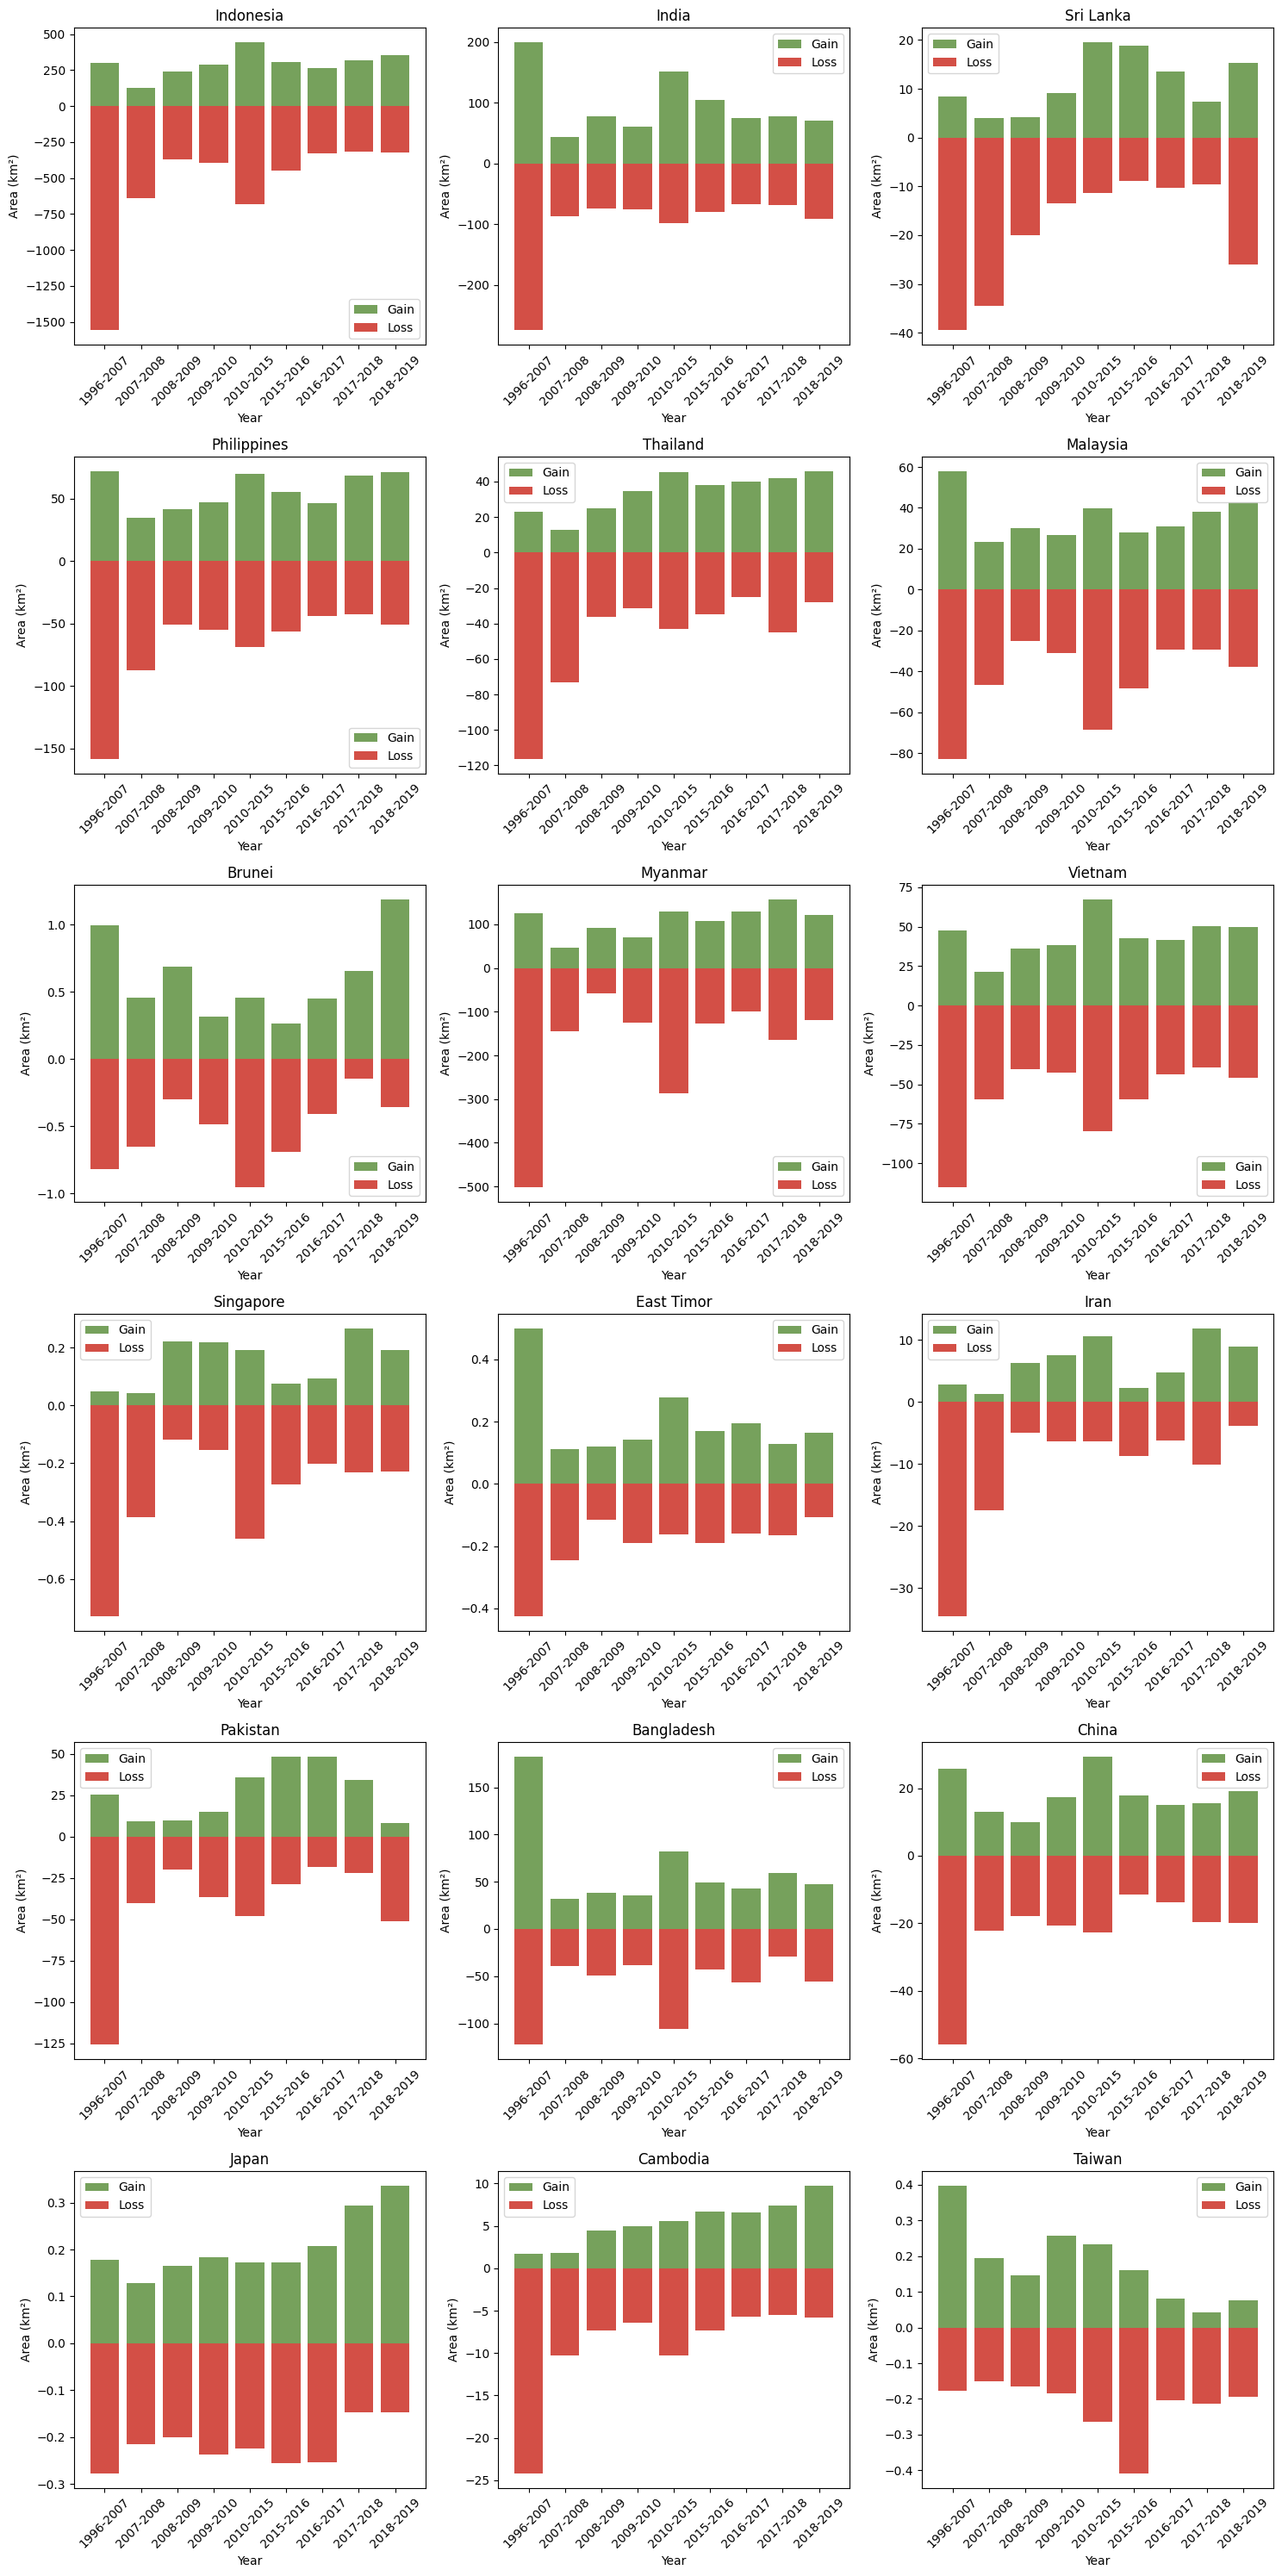

In [ ]:

# List of years
years = ["2007", "2008", "2009", "2010", "2015", "2016", "2017", "2018", "2019"]

# Define the new labels for the x-axis
year_intervals = ["1996-2007", "2007-2008", "2008-2009", "2009-2010", "2010-2015", "2015-2016", "2016-2017", "2017-2018", "2018-2019"]

# Determine the number of subplots (rows and columns)
n_countries = len(change_analysis)
n_cols = 3
n_rows = (n_countries + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Colors for gain and loss
gain_color = '#76A15C'
loss_color = '#D34F46'

# Loop through each country
for idx, (country, data) in enumerate(change_analysis.items()):
    gains = [data.get(year, {}).get('Gain', 0) for year in years]
    losses = [-data.get(year, {}).get('Loss', 0) for year in years]

    # Create a stacked bar graph
    axes[idx].bar(year_intervals, gains, color=gain_color, label='Gain')
    axes[idx].bar(year_intervals, losses, color=loss_color, label='Loss')

    # Add labels, title, and legend
    axes[idx].set_xlabel('Year')
    axes[idx].set_ylabel('Area (km²)')
    axes[idx].set_title(f'{country}')
    axes[idx].legend()
    axes[idx].tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

# Hide any extra subplots
for idx in range(n_countries, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


We then plotted mangrove losses over the years from 1996 to 2019 for each country.

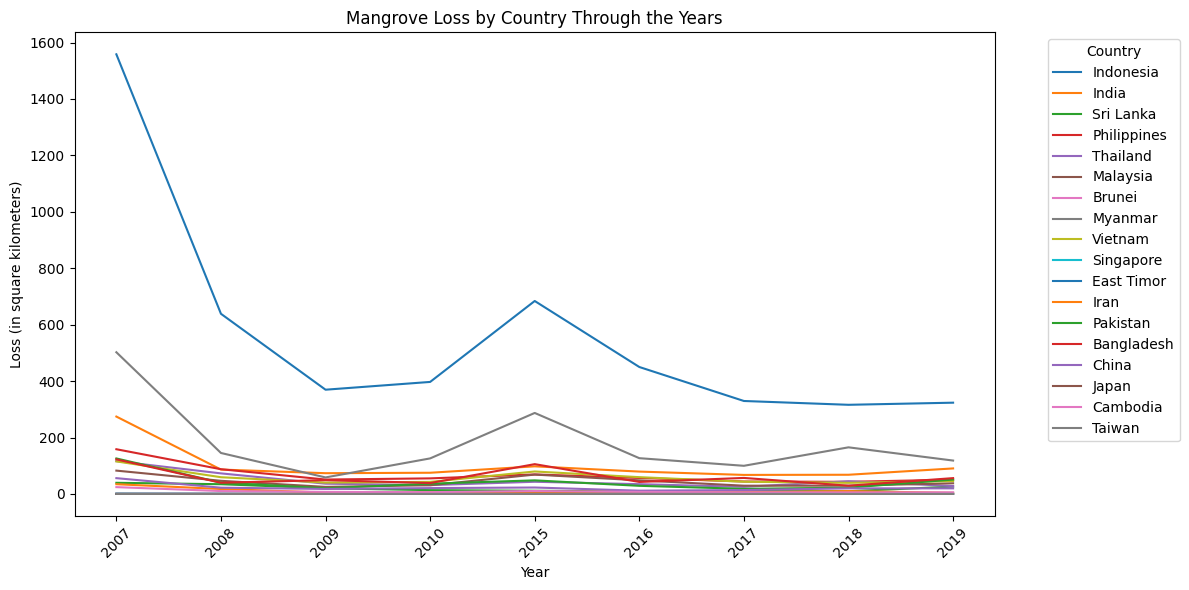

In [ ]:


# List of years
years = ["2007", "2008", "2009", "2010", "2015", "2016", "2017", "2018", "2019"]

plt.figure(figsize=(12, 6))

# Iterate through the results, plotting a line for each country
for country_name, country_data in change_analysis.items():
    losses = [country_data.get(year, {}).get('Loss', 0) for year in years]
    plt.plot(years, losses, label=country_name)

# Add labels and a legend
plt.xlabel('Year')
plt.ylabel('Loss (in square kilometers)')
plt.title('Mangrove Loss by Country Through the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Country')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



The graph shows a large difference in losses between the pairs of years with the most years in between: 1996-2007 with 11 years difference and 2010 and 2015 with 4 years difference.

The following are the 10 countries with the highest losses in mangrove extent Which are the countries with the highest losses in Asia over the years.

In [ ]:
# Dictionary to store the total loss for each country
total_loss_per_country = {}

# Iterate through the change_analysis to calculate the total loss
for country, years_data in change_analysis.items():
    total_loss = sum(changes['Loss'] for changes in years_data.values())
    total_loss_per_country[country] = total_loss

# Sort by loss and get the top 3 countries
top_10_loss_countries = sorted(total_loss_per_country.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the results
for country, loss in top_10_loss_countries:
    print(f"{country}: {loss} km²")


Indonesia: 5066.443912891113 km²
Myanmar: 1629.3143871710977 km²
India: 912.4722523318812 km²
Philippines: 615.8884683844002 km²
Bangladesh: 540.075079702852 km²
Vietnam: 525.4171670908794 km²
Thailand: 432.8614169173802 km²
Malaysia: 398.30620397180206 km²
Pakistan: 390.75628583310043 km²
China: 204.47415653541532 km²


Finally we create a dataframe with the loss for each pair of years in each country. The columns are named after the second year of the pair. This way the last year is treated as the year where the loss is evidenced.

In [ ]:


# Create new dataframe with the losses by country by year
loss_data = {}
for country, years in change_analysis.items():
    loss_data[country] = {f'{year}': data['Loss'] for year, data in years.items()}

loss_df = pd.DataFrame.from_dict(loss_data, orient='index')

# Reset the index to move countries into a column
loss_df.reset_index(inplace=True)

# Rename the new column to "Country"
loss_df.rename(columns={'index': 'Country'}, inplace=True)

print(loss_df)



        Country         2007        2008        2009        2010        2015  \
0     Indonesia  1558.348957  638.589372  369.504146  397.069838  683.968271   
1         India   274.285345   86.432245   73.552735   75.129749   97.870454   
2     Sri Lanka    39.492944   34.499772   20.023841   13.512628   11.282391   
3   Philippines   158.491818   87.682440   51.063013   55.189382   69.128787   
4      Thailand   116.267339   72.916006   36.370785   31.277696   43.153295   
5      Malaysia    82.709444   46.576945   25.018952   30.889215   68.644655   
6        Brunei     0.822672    0.652457    0.301064    0.489934    0.957013   
7       Myanmar   502.282821  145.227755   58.535737  125.994902  287.125280   
8       Vietnam   115.379050   59.271478   40.289796   42.762302   79.651071   
9     Singapore     0.727817    0.386860    0.116918    0.153034    0.460938   
10   East Timor     0.424914    0.246414    0.115775    0.191333    0.162220   
11         Iran    34.530398   17.516559

This dataframe is exported for further analysis. Because this one will be related to the loss of mangroves but caused by the construction of ponds in each country.

In [ ]:
loss_df.to_csv('/content/drive/MyDrive/colab_data/Mangrove/GMW_v3/loss_data_asia.csv')
